In [1]:
from smpl import io

In [2]:
from pyfeyn2.interface import qgraf

In [ ]:
style = "tmp.sty"
model ="tmp.model"
dat  = "tmp.dat"
output = "tmp.out"

io.write(model,
         io.pr(qgraf.get_example_model()),
         create_dir=False)
io.write(style,
         qgraf.get_style(),
         create_dir=False)
io.write(dat,
          f"""
 output= '{output}' ;
 style= '{style}' ;
 model = '{model}';
 in= g[p1], g[p2];
 out= g[k1], g[k2];
 loops= 0;
 loop_momentum= l;
 options= notadpole, onshell;
 """
         ,create_dir=False)
io.remove(output)

In [4]:
import subprocess
import shlex
subprocess.call(shlex.split(f'qgraf {dat}'))


 --------------------------------------------------------------
                          qgraf-3.6.5
 --------------------------------------------------------------

  output= 'tmp.out' ;
  style= 'tmp.sty' ;
  model = 'tmp.model';
  in= g[p1], g[p2];
  out= g[k1], g[k2];
  loops= 0;
  loop_momentum= l;
  options= notadpole, onshell;

 --------------------------------------------------------------

   #loops    v-degrees          #diagrams

      0
              -   4^1     ....     1
             3^2   -      ....     3


        total =  4 connected diagrams



0

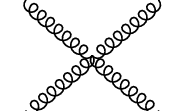

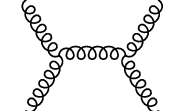

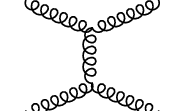

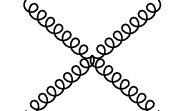

In [5]:
from pathlib import Path
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.render.latex.feynmp import FeynmpRender
from pyfeyn2.feynmandiagram import FeynML
from pyfeyn2.render.latex.dot import feynman_adjust_points

xml_string = Path("tmp.out").read_text()
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)
for d in fml.diagrams:
    t = FeynmpRender(d)
    t.render(show=True)